In [106]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
%matplotlib inline

In [107]:
train = pd.read_csv("f:/greyatom-ml/data/train.csv")
test = pd.read_csv("f:/greyatom-ml/data/test.csv")

In [108]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [109]:
#Finding the number of unique values of sentiments
train['sentiment'].value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7274 non-null int64
tweet        7273 non-null object
sentiment    7274 non-null int64
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


In [111]:
#Removing the rows which have null values
train.dropna(inplace=True)

In [112]:
train.isnull().sum()

tweet_id     0
tweet        0
sentiment    0
dtype: int64

In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 2 columns):
tweet_id    1819 non-null int64
tweet       1819 non-null object
dtypes: int64(1), object(1)
memory usage: 28.5+ KB


In [114]:
train['tweet']=train['tweet'].astype(str) 

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7273 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7273 non-null int64
tweet        7273 non-null object
sentiment    7273 non-null int64
dtypes: int64(2), object(1)
memory usage: 227.3+ KB


In [116]:
test.isnull().sum()

tweet_id    0
tweet       0
dtype: int64

In [117]:
#Removing the HTML encoders using BeautifulSoup library
train['tweet']=[BeautifulSoup(text).get_text() for text in train['tweet'] ]

In [118]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [119]:
train['tweet'][2]

'one of the most in-your-face ex. of stealing the show in yrs RT @mention "At #SXSW, Apple schools the mkt experts"  {link}'

In [120]:
#Removing @Mention from the text
def remove_pattern(pattern,text):
    reg=re.findall(pattern,text)
    for i in reg:
        text=re.sub(i,"",text)
    return text

In [121]:
train['tweet'] = np.vectorize(remove_pattern)("@[\w]*",train['tweet'])
train['tweet'] = np.vectorize(remove_pattern)("{link}*",train['tweet'])


In [122]:
train['tweet'] = [re.sub("[^a-zA-Z#]", " ", e) for e in train['tweet'].str.lower()]

In [123]:
train['tweet'] = np.vectorize(remove_pattern)("#sxsw",train['tweet'])

In [124]:
train['tweet'].head()

0    nui  #apple defining language of touch with di...
1    learning ab google doodles  all doodles should...
2    one of the most in your face ex  of stealing t...
3    this iphone  app would b pretty awesome if it ...
4    line outside the apple store in austin waiting...
Name: tweet, dtype: object

In [125]:
train['tweet']=train['tweet'].str.strip()

In [126]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [166]:
# extracting hashtags from positive

HT_pos = hashtag_extract(train['tweet'][train['sentiment'] == 2])
HT_neg = hashtag_extract(train['tweet'][train['sentiment'] == 0])
HT_neu = hashtag_extract(train['tweet'][train['sentiment'] == 1])
HT_cs = hashtag_extract(train['tweet'][train['sentiment'] == 3])

In [168]:
# unnesting list
HT_pos = sum(HT_pos,[])
HT_neg = sum(HT_neg,[])
HT_neu = sum(HT_neu,[])
HT_cs = sum(HT_cs,[])

In [169]:
pos = nltk.FreqDist(HT_pos)
neg = nltk.FreqDist(HT_neg)
neu = nltk.FreqDist(HT_neu)
cs = nltk.FreqDist(HT_cs)

In [170]:
pos
neg

FreqDist({'ipad': 21, 'iphone': 13, 'apple': 12, 'google': 11, 'tapworthy': 10, 'fail': 9, 'circles': 8, 'japan': 7, 'qagb': 4, 'pnid': 4, ...})

In [171]:
p = pd.DataFrame({'Pos_Hashtag': list(pos.keys()),
                  'Count': list(pos.values())})
n = pd.DataFrame({'Neg_Hashtag': list(neg.keys()),
                  'Count': list(neg.values())})
nu = pd.DataFrame({'Neu_Hashtag': list(neu.keys()),
                  'Count': list(neu.values())})
c = pd.DataFrame({'CS_Hashtag': list(cs.keys()),
                  'Count': list(cs.values())})


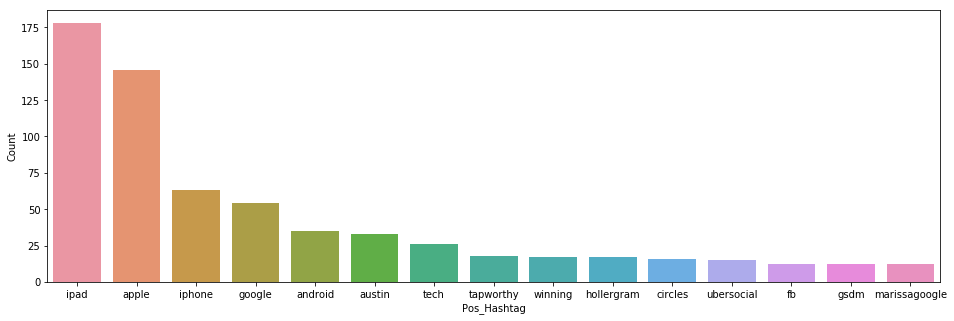

In [172]:
# selecting top 10 most frequent hashtags     
p = p.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=p, x= "Pos_Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

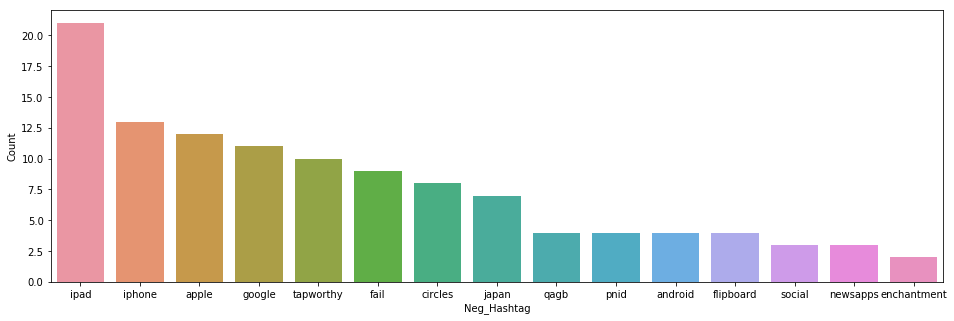

In [173]:
# selecting top 10 most frequent hashtags     
n = n.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=n, x= "Neg_Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

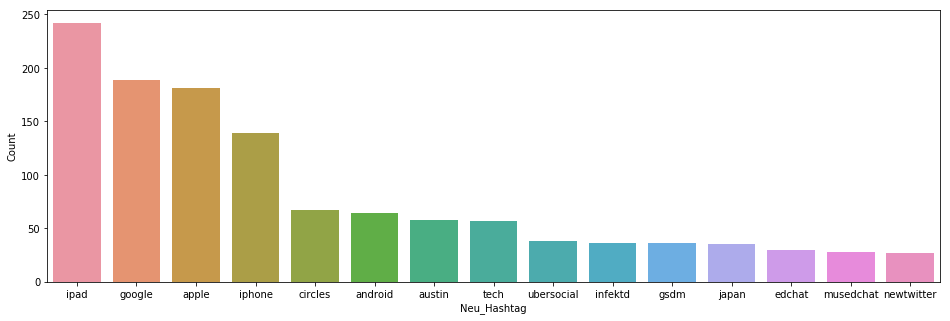

In [174]:
nu = nu.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=nu, x= "Neu_Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

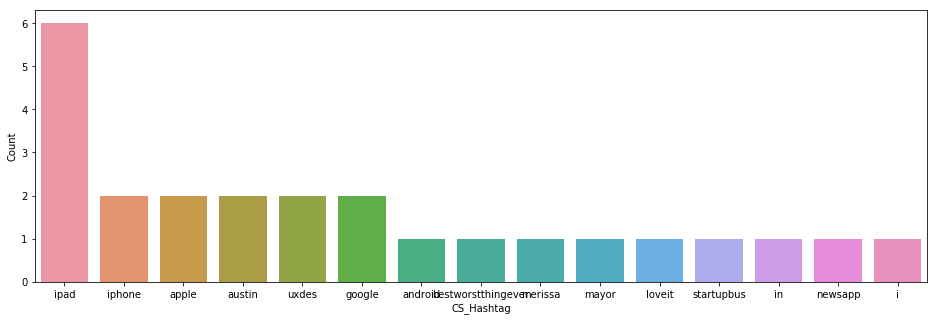

In [175]:
c = c.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=c, x= "CS_Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [70]:
HT = hashtag_extract(train['tweet'])
HT = sum(HT,[])
nltk.FreqDist(HT)

FreqDist({'sxsw': 7313, 'ipad': 447, 'apple': 341, 'google': 256, 'sxswi': 249, 'iphone': 217, 'android': 104, 'austin': 94, 'circles': 92, 'tech': 83, ...})

In [98]:
from matplotlib_venn import venn3,venn3_circles

In [138]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hemen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [73]:
negative=train[train['sentiment']==0]['tweet']


In [74]:
freq_neg= pd.Series(' '.join(negative).split()).value_counts()

In [75]:
freq_neg

#sxsw               456
the                 251
to                  196
ipad                152
i                   139
is                  131
a                   123
iphone              118
at                  111
rt                  109
google              108
of                  102
for                  98
in                   98
apple                88
it                   82
my                   81
and                  79
t                    76
on                   73
s                    69
not                  65
an                   62
that                 53
you                  52
app                  50
with                 47
have                 39
as                   39
be                   39
                   ... 
speller               1
huge                  1
shite                 1
blurs                 1
idiot                 1
eg                    1
xoom                  1
letting               1
#popupstore           1
facing                1
bgr             

In [163]:
positive=train[train['sentiment']==2]['tweet']

In [164]:
freq_pos= pd.Series(' '.join(positive).split()).value_counts()

In [165]:
freq_pos

the             1289
to               943
at               828
ipad             817
rt               768
for              726
a                650
apple            598
i                530
google           526
is               523
of               509
in               504
and              481
s                440
store            426
it               393
iphone           387
up               359
on               351
app              317
new              297
you              279
an               254
my               252
with             251
austin           199
just             194
this             176
be               164
                ... 
hosting            1
hurt               1
strums             1
handicapped        1
reeling            1
brisk              1
ranked             1
gain               1
begin              1
companies          1
venturebeat        1
battle             1
lookin             1
client             1
ray                1
seesmic            1
maudies      

In [166]:
neutral=train[train['sentiment']==1]['tweet']
freq_neu= pd.Series(' '.join(neutral).split()).value_counts()
freq_neu

the             1289
to               943
at               828
ipad             817
rt               768
for              726
a                650
apple            598
i                530
google           526
is               523
of               509
in               504
and              481
s                440
store            426
it               393
iphone           387
up               359
on               351
app              317
new              297
you              279
an               254
my               252
with             251
austin           199
just             194
this             176
be               164
                ... 
hosting            1
hurt               1
strums             1
handicapped        1
reeling            1
brisk              1
ranked             1
gain               1
begin              1
companies          1
venturebeat        1
battle             1
lookin             1
client             1
ray                1
seesmic            1
maudies      

In [167]:
cantSay=train[train['sentiment']==3]['tweet']
freq_cs= pd.Series(' '.join(cantSay).split()).value_counts()
freq_cs

the           60
at            39
ipad          38
a             38
google        37
i             35
to            34
is            34
of            33
for           31
apple         28
rt            27
on            25
iphone        24
in            20
s             17
store         17
my            17
up            16
it            15
be            15
you           13
t             13
an            12
and           12
like          11
but           11
austin        11
have          10
your          10
              ..
had            1
glad           1
exactly        1
large          1
call           1
boomers        1
brooklyn       1
donates        1
domain         1
queue          1
barry          1
nexus          1
um             1
tell           1
extra          1
browser        1
xl             1
other          1
makin          1
limited        1
zappos         1
expecting      1
quick          1
journalism     1
load           1
unemployed     1
popup          1
longhorn      

In [168]:
freq= pd.Series(' '.join(train['tweet']).split()).value_counts()
freq

the             3609
to              2878
at              2497
rt              2378
for             2035
ipad            1948
a               1887
google          1859
in              1576
apple           1548
i               1371
of              1365
is              1352
and             1306
store           1204
s               1131
on              1064
iphone          1064
up              1030
you              882
it               867
new              863
austin           699
with             699
an               682
app              656
my               653
social           517
launch           514
this             493
                ... 
bergstrom          1
panorama           1
ipadi              1
omar               1
fondling           1
amen               1
lovefresh          1
activations        1
lava               1
bloomberg          1
laporte            1
relaxed            1
nije               1
revolutions        1
spinning           1
tug                1
serious      

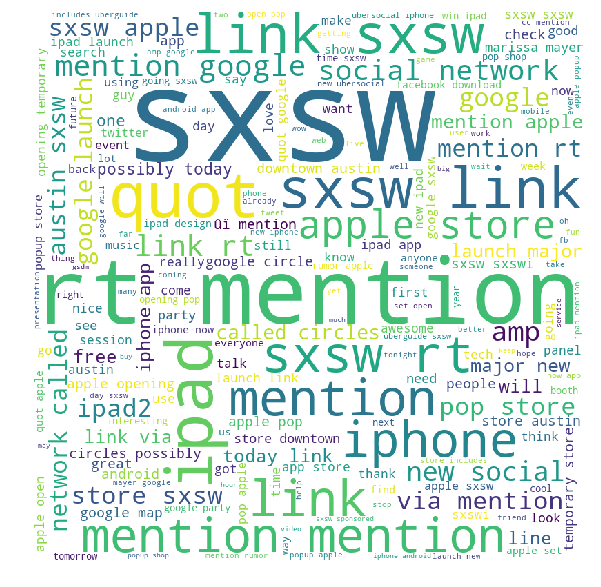

In [103]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  

df_cloud=train.tweet
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_cloud: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [146]:
df_pos=pd.DataFrame(HT_pos,columns=['positive_HT'])
df_neg=pd.DataFrame(HT_neg,columns=['negative_HT'])
df_neu=pd.DataFrame(HT_neu,columns=['neutral_HT'])
df_cs=pd.DataFrame(HT_cs,columns=['cantsay_HT'])

In [147]:
df_pos['Sentiment']=2
df_neg['Sentiment']=0
df_neu['Sentiment']=1
df_cs['Sentiment']=3

In [151]:
HT_cs

['android',
 'iphone',
 'ipad',
 'bestworstthingever',
 'merissa',
 'mayor',
 'loveit',
 'startupbus',
 'in',
 'newsapp',
 'i',
 'ipad',
 'yourmom',
 'cstejas',
 'ipad',
 'apple',
 'news',
 'bettersearch',
 'apple',
 'austin',
 'ipad',
 'doyoureallyneedthat',
 'uxdes',
 'ipad',
 'socialnetworks',
 'google',
 'circles',
 'facebook',
 'busy',
 'disagree',
 'uxdes',
 'li',
 'mobilesearch',
 'google',
 'coudbeeasier',
 'openbeta',
 'usguys',
 'dgtltribe',
 'netflixiphone',
 'arabspring',
 'psfk',
 'mccannsxsw',
 'mrmworldwide',
 'microformats',
 'newsapps',
 'japan',
 'internalalarmclockftw',
 'crazytimes',
 'stevejobswins',
 'impulse',
 'h',
 'notwinning',
 'mwrc',
 'qagb',
 'ipad',
 'amusing',
 'smccolumbus',
 'iphone',
 'games',
 'randomly',
 'agnerd',
 'agchat',
 'fail',
 'tapworthy',
 'gsdm',
 'austin',
 'digitaldeath',
 'designingforkids',
 'sapient']

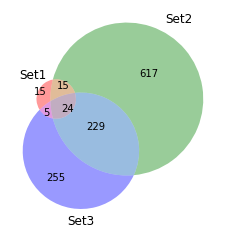

In [152]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles
set1 = set(HT_cs)
set2 = set(HT_neu)
set3 = set(HT_pos)

venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))